In [29]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.6.2


In [30]:
column_names = []
column_names.append('price')
for i in range(99):
    column_names.append('{}_minutes_ago_price'.format(str(i+1)))
column_names.append('after_5_minutes_price')
column_names

['price',
 '1_minutes_ago_price',
 '2_minutes_ago_price',
 '3_minutes_ago_price',
 '4_minutes_ago_price',
 '5_minutes_ago_price',
 '6_minutes_ago_price',
 '7_minutes_ago_price',
 '8_minutes_ago_price',
 '9_minutes_ago_price',
 '10_minutes_ago_price',
 '11_minutes_ago_price',
 '12_minutes_ago_price',
 '13_minutes_ago_price',
 '14_minutes_ago_price',
 '15_minutes_ago_price',
 '16_minutes_ago_price',
 '17_minutes_ago_price',
 '18_minutes_ago_price',
 '19_minutes_ago_price',
 '20_minutes_ago_price',
 '21_minutes_ago_price',
 '22_minutes_ago_price',
 '23_minutes_ago_price',
 '24_minutes_ago_price',
 '25_minutes_ago_price',
 '26_minutes_ago_price',
 '27_minutes_ago_price',
 '28_minutes_ago_price',
 '29_minutes_ago_price',
 '30_minutes_ago_price',
 '31_minutes_ago_price',
 '32_minutes_ago_price',
 '33_minutes_ago_price',
 '34_minutes_ago_price',
 '35_minutes_ago_price',
 '36_minutes_ago_price',
 '37_minutes_ago_price',
 '38_minutes_ago_price',
 '39_minutes_ago_price',
 '40_minutes_ago_price',

In [31]:
raw_dataset = pd.read_csv('./data/ignore_volume.csv', names=column_names, na_values='?', comment='\t',sep=',', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,price,1_minutes_ago_price,2_minutes_ago_price,3_minutes_ago_price,4_minutes_ago_price,5_minutes_ago_price,6_minutes_ago_price,7_minutes_ago_price,8_minutes_ago_price,9_minutes_ago_price,...,91_minutes_ago_price,92_minutes_ago_price,93_minutes_ago_price,94_minutes_ago_price,95_minutes_ago_price,96_minutes_ago_price,97_minutes_ago_price,98_minutes_ago_price,99_minutes_ago_price,after_5_minutes_price
2022-06-19 07:18:00,2489644,2488616,2487434,2481589,2477998,2478620,2480221,2477945,2477655,2474902,...,2436822,2433726,2436709,2433665,2435415,2435212,2432801,2428677,2434319,2490635
2022-06-19 07:19:00,2493102,2489644,2488616,2487434,2481589,2477998,2478620,2480221,2477945,2477655,...,2442561,2436822,2433726,2436709,2433665,2435415,2435212,2432801,2428677,2488665
2022-06-19 07:20:00,2496960,2493102,2489644,2488616,2487434,2481589,2477998,2478620,2480221,2477945,...,2445964,2442561,2436822,2433726,2436709,2433665,2435415,2435212,2432801,2487811
2022-06-19 07:21:00,2495759,2496960,2493102,2489644,2488616,2487434,2481589,2477998,2478620,2480221,...,2449469,2445964,2442561,2436822,2433726,2436709,2433665,2435415,2435212,2489570
2022-06-19 07:22:00,2494761,2495759,2496960,2493102,2489644,2488616,2487434,2481589,2477998,2478620,...,2448513,2449469,2445964,2442561,2436822,2433726,2436709,2433665,2435415,2489694


In [32]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [28]:
train_stats = train_dataset.describe()
train_stats.pop("after_5_minutes_price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
price,10015.0,3.143483e+06,473445.456679,2380149.0,2777264.0,2984268.0,3687067.5,4037242.0
1_minutes_ago_price,10015.0,3.143590e+06,473448.605313,2380149.0,2777470.0,2984207.0,3686985.0,4037242.0
2_minutes_ago_price,10015.0,3.143669e+06,473476.425810,2380149.0,2777545.0,2984045.0,3687078.5,4037128.0
3_minutes_ago_price,10015.0,3.143776e+06,473492.617587,2380149.0,2777480.5,2984395.0,3687325.5,4037242.0
4_minutes_ago_price,10015.0,3.143907e+06,473511.476832,2380149.0,2777679.0,2984588.0,3687325.5,4037128.0
...,...,...,...,...,...,...,...,...
95_minutes_ago_price,10015.0,3.154950e+06,475378.974861,2380149.0,2779696.0,2989359.0,3689935.5,4037242.0
96_minutes_ago_price,10015.0,3.155082e+06,475404.702283,2380149.0,2779726.0,2989310.0,3690109.5,4037242.0
97_minutes_ago_price,10015.0,3.155192e+06,475473.366023,2380672.0,2779423.0,2989359.0,3690109.5,4037128.0
98_minutes_ago_price,10015.0,3.155326e+06,475526.616285,2380672.0,2779726.0,2989220.0,3690323.5,4037242.0


In [35]:
train_labels = train_dataset.pop('after_5_minutes_price')
test_labels = test_dataset.pop('after_5_minutes_price')

In [36]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [37]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

model = build_model()

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 10,689
Trainable params: 10,689
Non-trainable params: 0
_________________________________________________________________


In [39]:
example_batch = normed_train_data[:10]
example_batch

,price,1_minutes_ago_price,2_minutes_ago_price,3_minutes_ago_price,4_minutes_ago_price,5_minutes_ago_price,6_minutes_ago_price,7_minutes_ago_price,8_minutes_ago_price,9_minutes_ago_price,...,90_minutes_ago_price,91_minutes_ago_price,92_minutes_ago_price,93_minutes_ago_price,94_minutes_ago_price,95_minutes_ago_price,96_minutes_ago_price,97_minutes_ago_price,98_minutes_ago_price,99_minutes_ago_price
2022-06-11 14:03:00,1.516985,1.521748,1.523690,1.528174,1.522894,1.522178,1.522710,1.526496,1.527465,1.519035,...,1.480162,1.492689,1.495787,1.493730,1.490394,1.487006,1.482118,1.477616,1.475391,1.474809
2022-06-15 18:03:00,-0.697923,-0.671261,-0.662478,-0.649482,-0.664190,-0.668698,-0.626508,-0.577373,-0.659504,-0.712922,...,-0.685339,-0.686922,-0.672184,-0.645049,-0.643088,-0.625923,-0.615707,-0.612739,-0.622523,-0.622865
2022-06-16 22:05:00,-0.869269,-0.864784,-0.859654,-0.868087,-0.862573,-0.867337,-0.861238,-0.860045,-0.852830,-0.853305,...,-0.832458,-0.831940,-0.823962,-0.817212,-0.814408,-0.810462,-0.810634,-0.808721,-0.811388,-0.814971
2022-06-16 23:18:00,-0.956949,-0.964537,-0.973208,-0.971702,-0.969923,-0.967010,-0.966229,-0.952954,-0.958703,-0.958568,...,-0.852551,-0.853081,-0.849746,-0.848645,-0.842525,-0.844241,-0.845995,-0.838792,-0.835487,-0.830856
2022-06-17 00:33:00,-0.919462,-0.922661,-0.915661,-0.901169,-0.894228,-0.889099,-0.887732,-0.889082,-0.886660,-0.881687,...,-0.942641,-0.946186,-0.951762,-0.957985,-0.952550,-0.945062,-0.945506,-0.945578,-0.940171,-0.942381
2022-06-12 00:37:00,1.449902,1.448762,1.447578,1.444644,1.437335,1.434223,1.433750,1.441049,1.441119,1.442266,...,1.442444,1.441145,1.441675,1.444484,1.451948,1.451738,1.454699,1.457819,1.458879,1.459435
2022-06-12 15:23:00,1.347494,1.354192,1.367447,1.362127,1.347341,1.332643,1.309408,1.298553,1.271274,1.274279,...,1.085661,1.090255,1.088160,1.085132,1.086783,1.087925,1.079310,1.083133,1.092552,1.089798
2022-06-12 02:17:00,1.391159,1.395610,1.399753,1.394162,1.389059,1.389504,1.390890,1.389946,1.387598,1.385038,...,1.418626,1.426038,1.421693,1.419693,1.420453,1.418459,1.417897,1.418925,1.420511,1.419015
2022-06-15 03:53:00,-0.477316,-0.473324,-0.464988,-0.464615,-0.471054,-0.470230,-0.474839,-0.483754,-0.481858,-0.470311,...,-0.381358,-0.379850,-0.380833,-0.377424,-0.377894,-0.381675,-0.371707,-0.360046,-0.364269,-0.360058
2022-06-19 03:00:00,-1.398354,-1.386150,-1.380320,-1.381248,-1.385042,-1.381471,-1.374318,-1.379044,-1.383225,-1.383766,...,-1.292252,-1.294452,-1.291518,-1.298539,-1.303062,-1.301941,-1.300707,-1.303255,-1.311665,-1.296547


In [40]:
example_result = model.predict(example_batch)
example_result

array([[ 0.5881062 ],
       [-0.32654768],
       [-0.46179014],
       [-0.5060352 ],
       [-0.5633397 ],
       [ 0.5971508 ],
       [ 0.41068405],
       [ 0.6168598 ],
       [-0.24892446],
       [-0.7815776 ]], dtype=float32)

In [92]:
# エポックが終わるごとにドットを一つ出力することで進捗を表示
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

# patience は改善が見られるかを監視するエポック数を表すパラメーター
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])


.............................

In [93]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
24,180751776.0,9861.956055,180751776.0,200924848.0,11040.907227,200924848.0,24
25,183039136.0,9898.159180,183039136.0,140449568.0,7920.669434,140449568.0,25
26,183243424.0,9981.606445,183243424.0,182585952.0,10074.085938,182585952.0,26
27,180746720.0,9899.165039,180746720.0,152801520.0,8720.536133,152801520.0,27
28,183216704.0,9927.096680,183216704.0,139175648.0,7794.204590,139175648.0,28


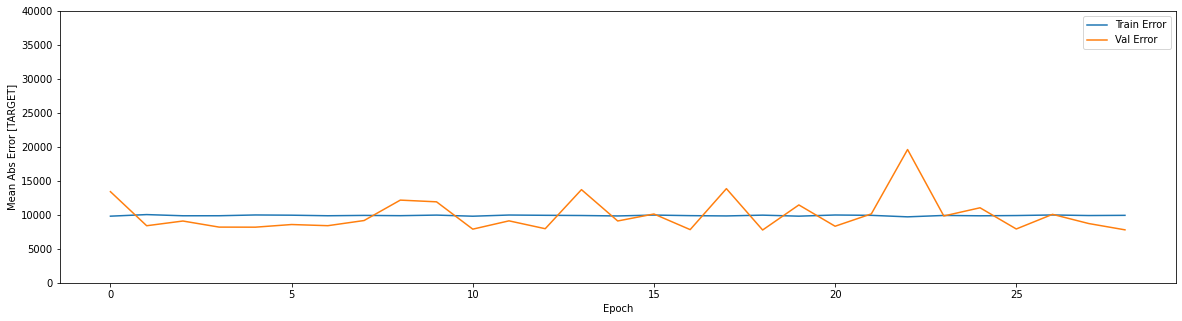

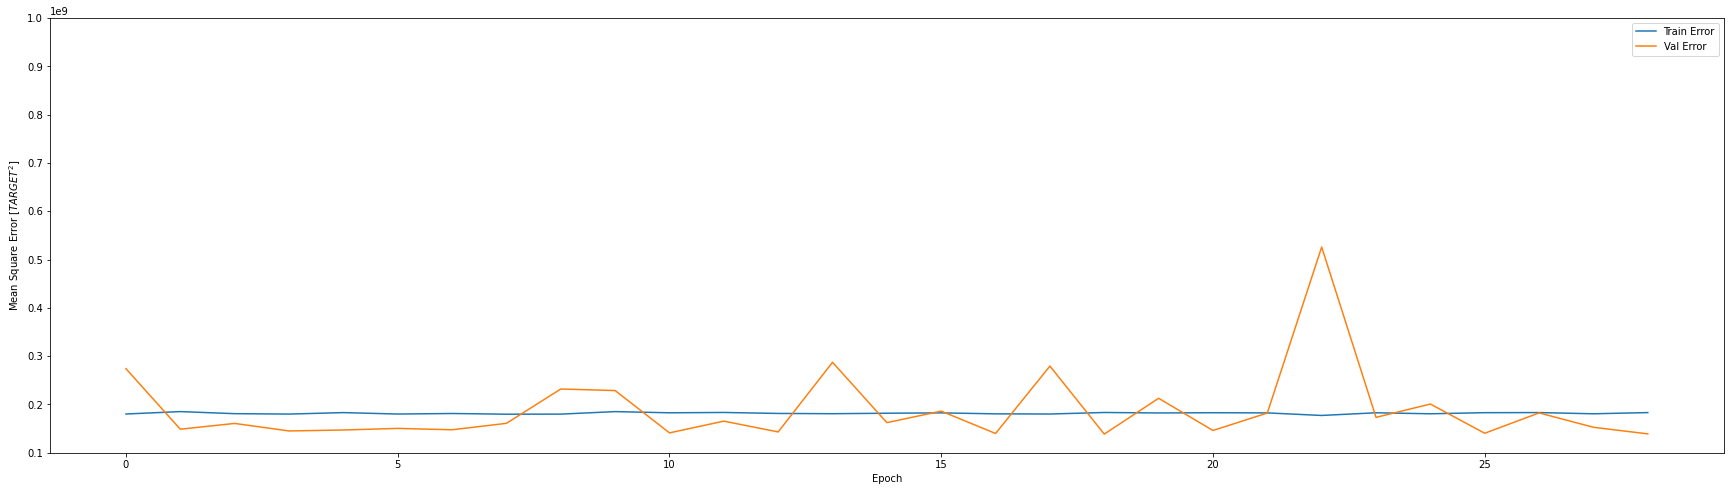

In [100]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(20,5))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [after_5_minutes_price]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,40000])
  plt.legend()

  plt.figure(figsize=(30,8))
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$after_5_minutes_price^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([100000000,1000000000.0])
  plt.legend()
  plt.show()

plot_history(history)

In [101]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} after_5_minutes_price".format(mae))

79/79 - 0s - loss: 148419360.0000 - mae: 8232.3945 - mse: 148419360.0000
Testing set Mean Abs Error: 8232.39 TargetPrice


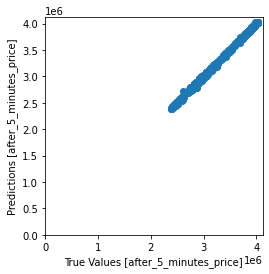

In [103]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [after_5_minutes_price]')
plt.ylabel('Predictions [after_5_minutes_price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

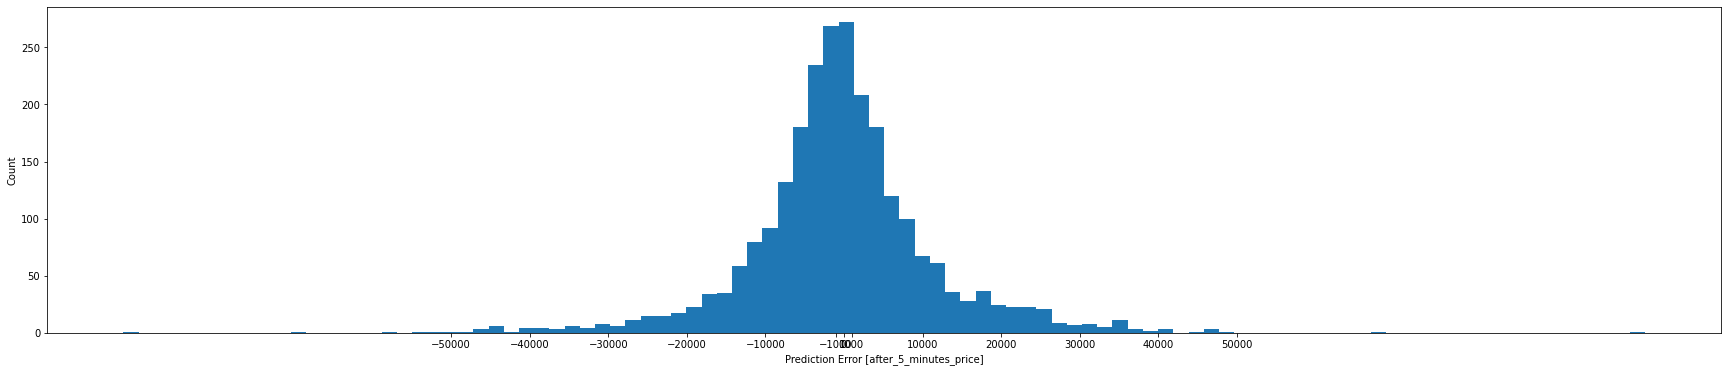

In [115]:
error = test_predictions - test_labels
plt.figure(figsize=(30,6))
plt.xticks([-50000, -40000, -30000, -20000, -10000, -1000, 0, 1000, 10000, 20000, 30000, 40000, 50000])
plt.hist(error, bins = 100)
plt.xlabel("Prediction Error [after_5_minutes_price]")
_ = plt.ylabel("Count")